 Use the Scikit-learn breast cancer Wisconsin dataset and a logistic regression
 model to classify breast cancers. You must recursively eliminate features to find the best
 two features to perform the classification. Evaluate the model using various classification
 metrics and report your findings. Use a 70%-30% split

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

In [ ]:
X,y = load_breast_cancer(return_X_y=True)

bcancer = load_breast_cancer(as_frame=True)

df = bcancer['frame']

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

True/False Selection of features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True False False False]
The best features are : ['worst compactness' 'worst concavity']


<ipython-input-72-44ab980e036f>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


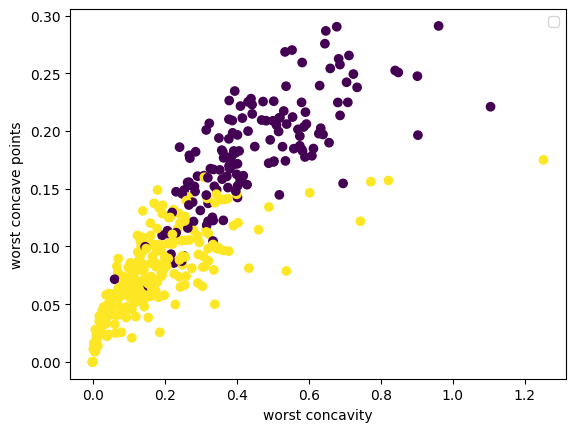

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


lr = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(lr, n_features_to_select=2)
rfe = rfe.fit(X_train, y_train)

print('True/False Selection of features:', rfe.support_)

feature_indices = np.arange(1,31)
feature_indices = feature_indices[rfe.support_]

plt.scatter(X_train[:,feature_indices[0]], X_train[:,feature_indices[1]], c =y_train)
plt.xlabel(bcancer.feature_names[feature_indices[0]])
plt.ylabel(bcancer.feature_names[feature_indices[1]])
plt.legend()

print('The best features are :', np.array(bcancer.feature_names)[rfe.support_])

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
model = log_reg.fit(X_train[:,26:28], y_train)

log_reg = LogisticRegression()
log_reg.fit(X_train[:,26:28], y_train)

y_proba = log_reg.predict_proba(X_test[:, 26:28])

In [ ]:
#Accuracy Score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, model.predict(X_test[:, 26:28]))

print("The accuracy score is ", acc_score)

#Average Precision
from sklearn.metrics import average_precision_score
prec_score = average_precision_score(y_test, model.predict(X_test[:, 26:28]))

print("The average precision score is ", prec_score)

#f1 score
from sklearn.metrics import f1_score
f1_score= f1_score(y_test, model.predict(X_test[:, 26:28]))

print("The f1 score is ", f1_score)

#Recall score
from sklearn.metrics import recall_score
rec_score = recall_score(y_test, model.predict(X_test[:, 26:28]))

print("The recall score is ", rec_score)

The accuracy score is  0.8596491228070176
The average precision score is  0.8328236078985084
The f1 score is  0.8947368421052632
The recall score is  0.9532710280373832
